In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [4]:
train.sample(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
8094,Rwanda,2016,uniqueid_2027,No,Rural,Yes,4,26,Female,Spouse,Married/Living together,Primary education,Other Income
18178,Tanzania,2017,uniqueid_3376,No,Urban,No,2,24,Female,Spouse,Single/Never Married,Primary education,Informally employed
4261,Kenya,2018,uniqueid_4262,No,Rural,Yes,2,45,Female,Head of Household,Widowed,Primary education,Self employed
13345,Rwanda,2016,uniqueid_7278,No,Rural,Yes,4,26,Male,Head of Household,Married/Living together,Primary education,Informally employed
18027,Tanzania,2017,uniqueid_3225,No,Rural,Yes,1,38,Female,Head of Household,Married/Living together,Primary education,Self employed


In [5]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [8]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

<Axes: xlabel='bank_account', ylabel='count'>

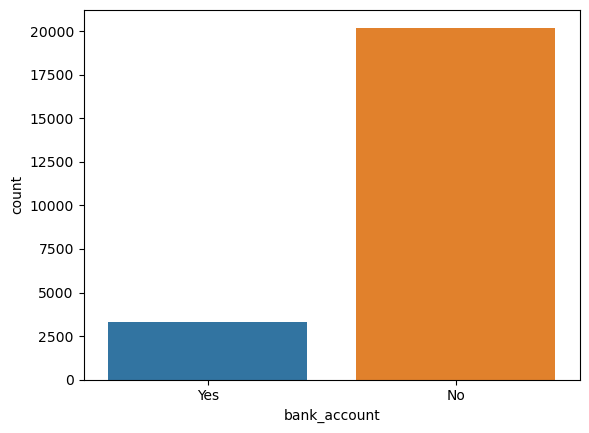

In [9]:
sns.countplot(data=train,x='bank_account')

<Axes: xlabel='bank_account', ylabel='count'>

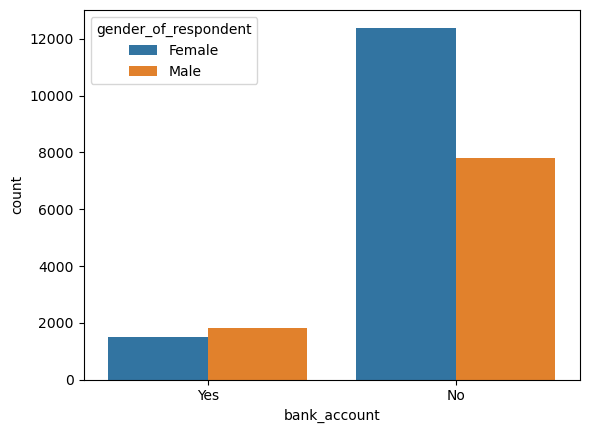

In [10]:
sns.countplot(data=train,x='bank_account',hue='gender_of_respondent')

<Axes: xlabel='bank_account', ylabel='count'>

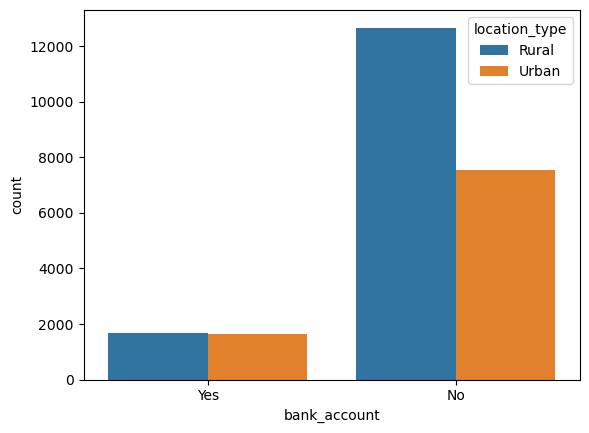

In [11]:
sns.countplot(data=train,x='bank_account',hue='location_type')

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [13]:
label = LabelEncoder()

train['bank_account'] = label.fit_transform(train.bank_account)

print(train.bank_account)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [14]:
X = train.drop('bank_account',axis=1)
y = train.bank_account

In [15]:
X.nunique()

country                      4
year                         3
uniqueid                  8735
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [16]:
X.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [17]:
def preprocessing(data):

    float_array = data[['household_size','age_of_respondent','year']].values.astype(float)

    categ = data[['country', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']]

    ndf = pd.get_dummies(data[['country', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']],prefix_sep='_').astype(int)

    data['location_type'] = label.fit_transform(data.location_type)
    data['cellphone_access'] = label.fit_transform(data.cellphone_access)
    data['gender_of_respondent'] = label.fit_transform(data.gender_of_respondent)

    data = pd.concat([data,ndf],axis=1)

    data = data.drop('uniqueid',axis=1)
    data = data.drop(['country', 'relationship_with_head', 'marital_status', 'education_level', 'job_type'],axis=1)    
        
    scaler = MinMaxScaler(feature_range=(0,1))
    data = scaler.fit_transform(data)

    return data

In [18]:
processed_train = preprocessing(X)
processed_test = preprocessing(test)

In [19]:
print(processed_train[:1])

[[1.        0.        1.        0.1       0.0952381 0.        1.
  0.        0.        0.        0.        0.        0.        0.
  0.        1.        0.        0.        1.        0.        0.
  0.        0.        0.        1.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        1.       ]]


In [20]:
print(processed_train.shape)

(23524, 37)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(processed_train,y,stratify=y,test_size=0.2,random_state=42)

In [1]:
from xgboost import XGBClassifier

# create models
model = XGBClassifier()

#fitting the models
model.fit(X_train,y_train)

ModuleNotFoundError: No module named 'xgboost'

In [23]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

# evaluate the model
predictions = model.predict(X_val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, predictions))

Error rate of XGB classifier:  0.11073326248671622


In [24]:
print(confusion_matrix(y_val,predictions))
print('\n')
print(classification_report(y_val,predictions))

[[3922  121]
 [ 400  262]]


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4043
           1       0.68      0.40      0.50       662

    accuracy                           0.89      4705
   macro avg       0.80      0.68      0.72      4705
weighted avg       0.88      0.89      0.88      4705



In [25]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
#my_xgb_model = GridSearchCV(model, param_grid,n_jobs=-1,verbose=2,cv=5)
#my_xgb_model.fit(X_train, y_train)
#print(my_xgb_model.best_params_)        

In [32]:
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.6, max_depth=3)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.1098831030818278


In [33]:
test.bank_account = xgb_model.predict(processed_test)

In [34]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

In [35]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
8682,uniqueid_8957 x Tanzania,0
7610,uniqueid_7885 x Tanzania,0
10034,uniqueid_2951 x Uganda,0
2915,uniqueid_9050 x Rwanda,0
6057,uniqueid_12192 x Rwanda,0


In [36]:
# Create submission csv file csv file
submission.to_csv('first_submission.csv', index = False)